#Transforming a Supervised problem to an Unsupervised Problem  

Primary Concepts  


*   Supervised and Unsupervised problems 
*   Transforming a supervised problem to an Unsupervised problem



In [ ]:
# Check Python version 
!python --version 

Python 3.6.9


In [ ]:
# Check GPU, if present 
!nvidia-smi 

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Download the dataset 
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
data    # Returns a Tuple containing features and 

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [ ]:
pixel_values, targets = data
targets = targets.astype(int) # Since targets are of string types by default

In [ ]:
pixel_values.shape

(70000, 784)

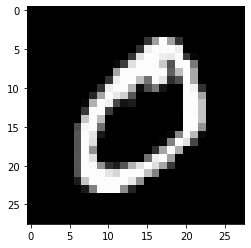

In [ ]:
single_image = pixel_values[1, :].reshape(28, 28)
plt.imshow(single_image, cmap='gray')

In [ ]:
tsne = manifold.TSNE(n_components=2, random_state=666)
transformed_data = tsne.fit_transform(pixel_values[:10000, :])

In [ ]:
tsne_df = pd.DataFrame(
            np.column_stack((transformed_data, targets[:10000])),
            columns=['x', 'y', 'targets']
        )

tsne_df.loc[:, 'targets'] = tsne_df.targets.astype(int)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


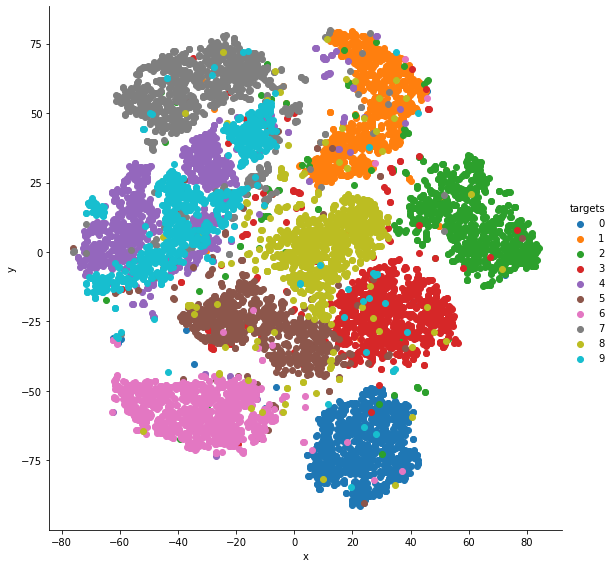

In [ ]:
# Plot the data 
grid = sns.FacetGrid(tsne_df, hue='targets', size=8)
grid.map(plt.scatter, 'x', 'y').add_legend()